# House Prices Competition : Term Project 

#### Description:

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

#### To do List :

* Functions for each data preparation and processing method
* Read about features engineering and selection
* apply pca
* how to select the non_numerical features that are most important 


### Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print ("Train data shape:", train.shape)

Train data shape: (1460, 81)


### Data preparation methods:

#### Skewness of the data :

Skewness is a measure of the degree of asymmetry of a distribution. If the left tail (tail at small end of the distribution) is more pronounced than the right tail (tail at the large end of the distribution), the function is said to have negative skewness. If the reverse is true, it has positive skewness. If the two are equal, it has zero skewness.

Skew is: 1.88287575977


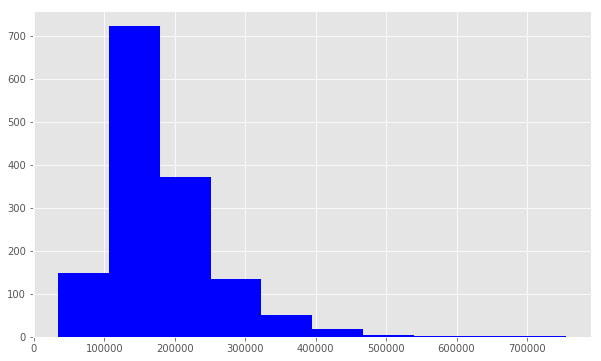

In [5]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

We apply log function to have zero skew 

Skew is: 0.121335062205


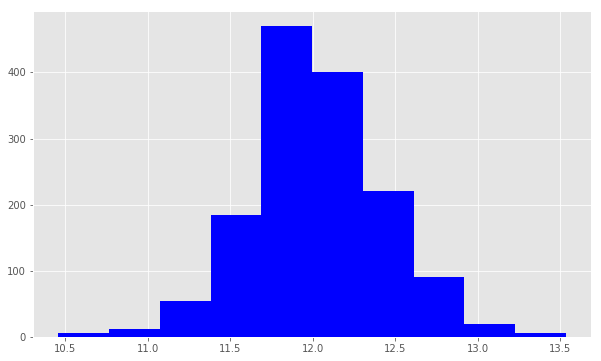

In [6]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

### Methods to handle Null values :

In [7]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
#nulls

#### Interpolation

we fill the missing values with an average value.

In [8]:
data_train_interpolated = train.select_dtypes(include=[np.number]).interpolate().dropna()
sum(data_train_interpolated.isnull().sum() != 0)

data_test_interpolated = test.select_dtypes(include=[np.number]).interpolate().dropna()
sum(data_test_interpolated.isnull().sum() != 0)

0

#### Imputing:  
to replace the null value with : 

* A constant value that has meaning within the domain, such as 0, distinct from all other values.
* A value from another randomly selected record.
* A mean, median or mode value for the column.
* A value estimated by another predictive model.

In [10]:
from sklearn.preprocessing import Imputer
my_imputer = Imputer()

#making a copy of data wit only numericl values
train_set = train.select_dtypes(include=[np.number])
test_set = test.select_dtypes(include=[np.number])

train_set = train_set.drop(['SalePrice', 'Id'], axis=1)

train_with_imputed_values = my_imputer.fit_transform(train_set)
test_with_imputed_values = my_imputer.fit_transform(test_set)

We can also fill with zero :

In [11]:
data_with_zeros_train = train_set.fillna(0)
data_with_zeros_test = test_set.fillna(0)

We can drop them,but it's not a recomanded method, because there is a possibility that the test set will have missing values in places where the training data did not, this will result in an error.

## Building the model:

### Linear Regression:

We can use with it Ridge Regularization: a process which shrinks the regression coefficients of less important features.http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
* loop diffrent values of alpha
* add more features


In [12]:
# apply log again (because we used skew before)
y = np.log(train.SalePrice)
X = data_train_interpolated.drop(['SalePrice', 'Id'], axis=1)


train_test_split() returns four objects:

* X_train is the subset of our features used for training.
* X_test is the subset which will be our 'hold-out' set - what we'll use to test the model.
* y_train is the target variable SalePrice which corresponds to X_train.
* y_test is the target variable SalePrice which corresponds to X_test. 

random_state=42 allow reproducible results.

In [13]:
from sklearn.model_selection import train_test_split
#first option
X_train, X_test, y_train, y_test = train_test_split(
                                   X, y, random_state=42, test_size=.33)
#second option
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
                                    train_with_imputed_values, y, random_state=42, test_size=.33)


In [14]:
lr = linear_model.LinearRegression()

In [15]:
model = lr.fit(X_train, y_train)
model_1 = lr.fit(X_train_1, y_train_1)

#### Evaluating the model:

In [16]:
print ("R^2 is: \n", model.score(X_test, y_test))
print ("R^2 is: \n", model_1.score(X_test_1, y_test_1))

R^2 is: 
 0.863278682315
R^2 is: 
 0.862909756222


In [17]:
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

In [18]:
print ('RMSE is: \n', mean_squared_error(y_train, predictions_train))
print ('RMSE is: \n', mean_squared_error(y_test, predictions_test))


RMSE is: 
 0.020990694448
RMSE is: 
 0.0233016033017


Train results :

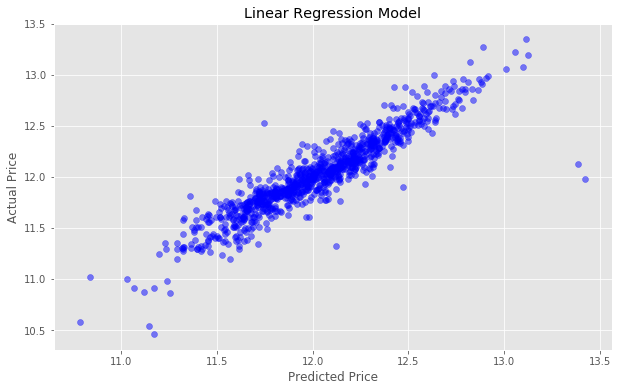

In [19]:

actual_values = y_train
plt.scatter(predictions_train, actual_values, alpha=.50,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

Test results :

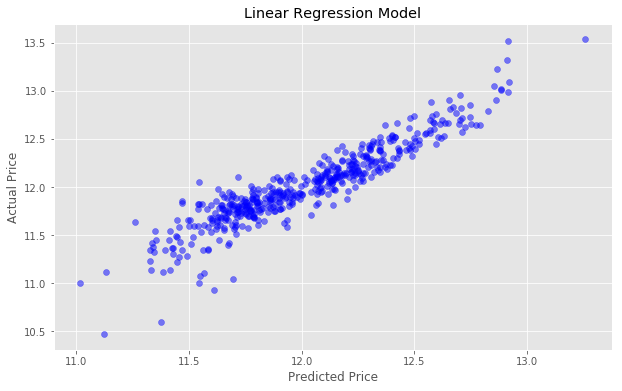

In [20]:
#testing
actual_values = y_test
plt.scatter(predictions_test, actual_values, alpha=.50,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()